In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\anish\02-2025 Instacart Basket Analysis"

In [3]:
path

'C:\\Users\\anish\\02-2025 Instacart Basket Analysis'

In [4]:
df_ords_prods_customers_merge =pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

## Question 2

### Bar Chart

<Axes: xlabel='orders_day_of_week'>

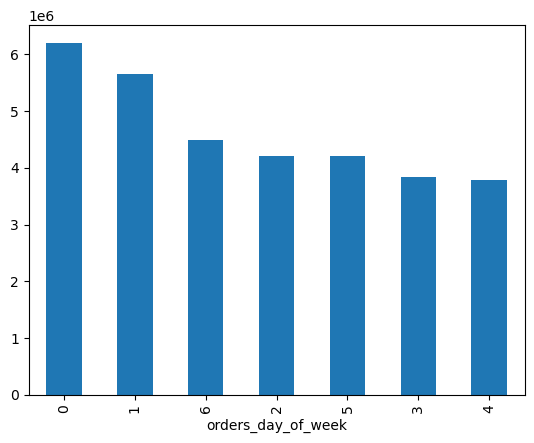

In [7]:
df_ords_prods_customers_merge['orders_day_of_week'].value_counts().plot.bar()

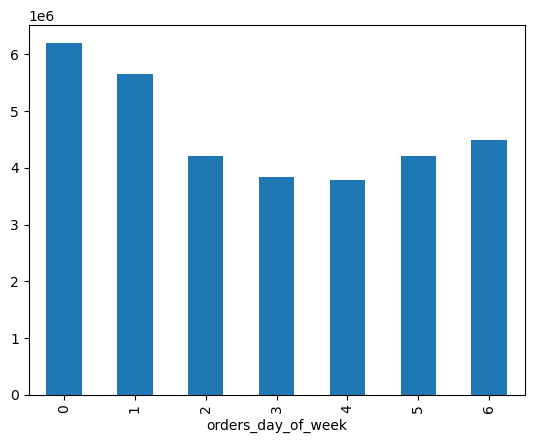

In [8]:
#indexing by order of days of week
bar = df_ords_prods_customers_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

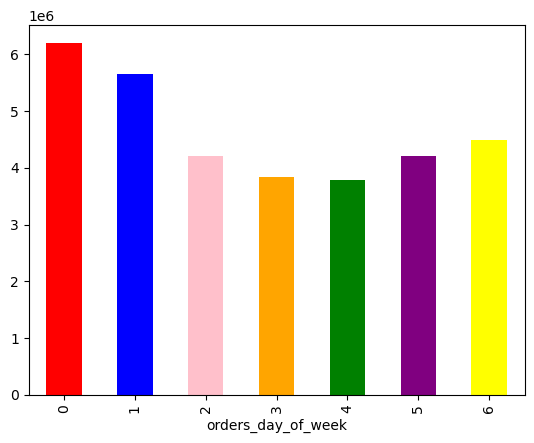

In [9]:
#adding colors
bar = df_ords_prods_customers_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red','blue','pink','orange','green','purple','yellow'])

In [10]:
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

### Histogram & Scatterplot

<Axes: ylabel='Frequency'>

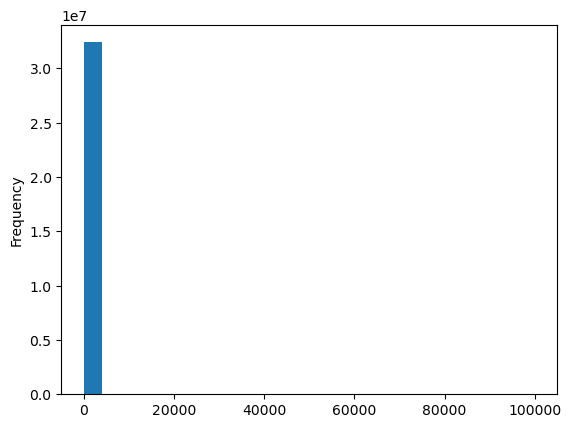

In [12]:
df_ords_prods_customers_merge['prices'].plot.hist(bins = 25)

In [13]:
df_ords_prods_customers_merge['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

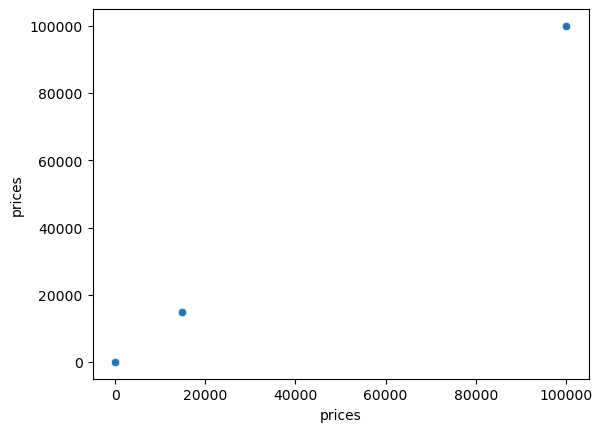

In [14]:
# Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_customers_merge)

In [15]:
#finding prices over $100
df_ords_prods_customers_merge.loc[ df_ords_prods_customers_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,orders_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both,Midwest
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both,Midwest
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both,South
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both,South
53674,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32321686,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both,South
32348893,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both,South
32348903,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both,South
32381705,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022,both,South


In [16]:
#null values to outliers
df_ords_prods_customers_merge.loc[df_ords_prods_customers_merge['prices'] >100, 'prices'] = np.nan

In [17]:
#finding max value 
df_ords_prods_customers_merge['prices'].max()

25.0

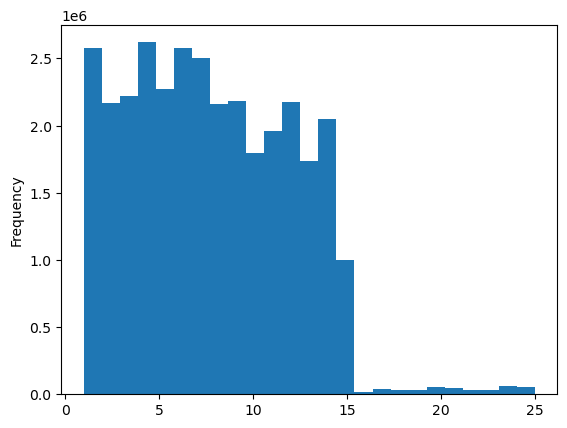

In [18]:
#histogram
hist = df_ords_prods_customers_merge['prices'].plot.hist(bins = 25)

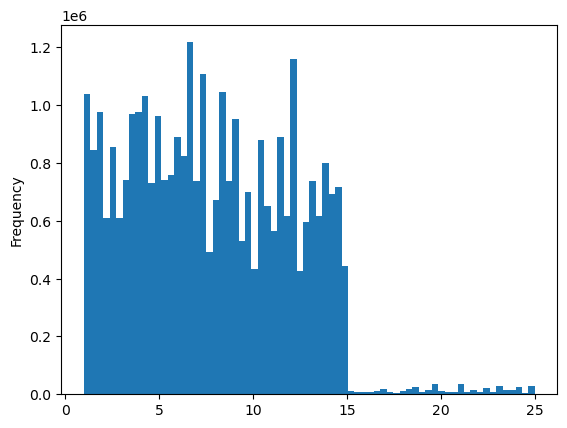

In [19]:
#add bins= more granularity
hist_2 = df_ords_prods_customers_merge['prices'].plot.hist(bins = 70)

In [20]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_orders_prices.png'))

## Sampling Data

In [22]:
#setting the seed and assigning the 'dev'
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customers_merge)) <= 0.7

In [23]:
#split into big and small
big = df_ords_prods_customers_merge[dev]
small = df_ords_prods_customers_merge[~dev]

In [24]:
len(df_ords_prods_customers_merge)

32406041

In [25]:
len(big) + len(small)

32406041

In [26]:
df_2 = small[['orders_day_of_week','prices']]

In [27]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


## Line Chart

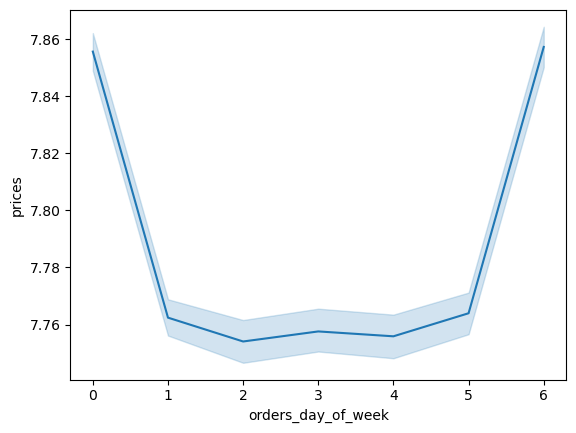

In [29]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [30]:
df_4 = df_ords_prods_customers_merge[['orders_day_of_week', 'prices']]

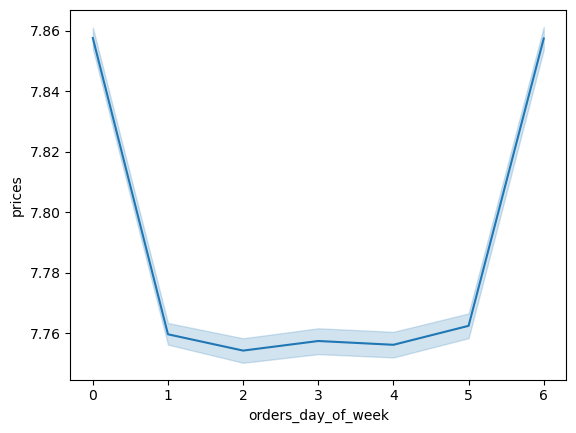

In [31]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

In [58]:
line = sns.lineplot(data = df_2, x = 'orders_hour',y = 'prices')

ValueError: Could not interpret value `orders_hour` for `x`. An entry with this name does not appear in `data`.